In [2]:
import pandas as pd
import numpy as np
from minisom import MiniSom

In [3]:
dataset=pd.read_csv('Credit_Card_Applications.csv')

In [12]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [13]:
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler(feature_range=(0,1))
X=scl.fit_transform(X)

In [14]:
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

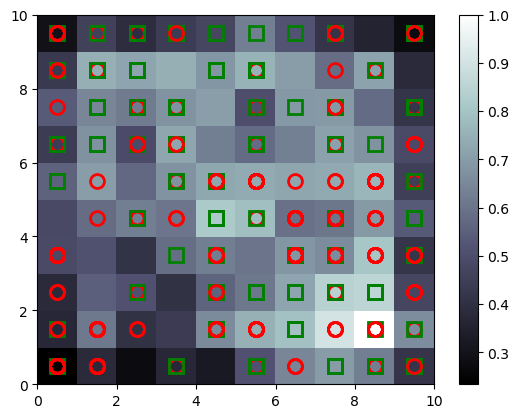

In [16]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i,x in enumerate(X):
    w=som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markersize=10,
         markeredgewidth=2,
         markerfacecolor='None')
show()

In [17]:
maps=som.win_map(X)
frauds=np.concatenate((maps[(7,2)],maps[(8,3)]),axis=0)
frauds=scl.inverse_transform(frauds)

In [18]:
print("Fraud Customer ID's")
for i in frauds[:,0]:
    print(int(i))

Fraud Customer ID's
15591360
15649183
15598266
15580579
15568819
15719940
15761158
15711742
15761733
15770995
15605872
15736399
15766734
15667934
15665087


In [21]:
customers=dataset.iloc[:,1:].values

In [22]:
customers

array([[1.000e+00, 2.208e+01, 1.146e+01, ..., 1.000e+02, 1.213e+03,
        0.000e+00],
       [0.000e+00, 2.267e+01, 7.000e+00, ..., 1.600e+02, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.958e+01, 1.750e+00, ..., 2.800e+02, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.883e+01, 9.540e+00, ..., 1.000e+02, 1.000e+00,
        1.000e+00],
       [0.000e+00, 2.742e+01, 1.450e+01, ..., 1.200e+02, 1.200e+01,
        1.000e+00],
       [1.000e+00, 4.100e+01, 4.000e-02, ..., 5.600e+02, 1.000e+00,
        1.000e+00]])

In [24]:
is_fraud=np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i]=1

In [25]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
customers=sc.fit_transform(customers)

In [27]:
customers

array([[ 0.68873723, -0.80105183,  1.34711063, ..., -0.48835847,
         0.03738039, -0.89530251],
       [-1.45193254, -0.75124044,  0.45054795, ..., -0.13959116,
        -0.19541334, -0.89530251],
       [-1.45193254, -0.16785619, -0.60482292, ...,  0.55794344,
        -0.19541334, -0.89530251],
       ...,
       [-1.45193254, -1.07543661,  0.96114643, ..., -0.48835847,
        -0.19541334,  1.11694091],
       [-1.45193254, -0.35021653,  1.95822062, ..., -0.3721027 ,
        -0.19330052,  1.11694091],
       [ 0.68873723,  0.79628971, -0.94857229, ...,  2.18552419,
        -0.19541334,  1.11694091]])

In [31]:
import tensorflow as tf
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
ann.fit(customers,is_fraud,batch_size=10,epochs=2)

Epoch 1/2
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.9618 - loss: 0.3919
Epoch 2/2
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.9689 - loss: 0.3673


In [36]:
pred=ann.predict(customers)
pred=np.concatenate((dataset.iloc[:,0:1].values,pred),axis=1)
pred=pred[pred[:,1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


In [38]:
pred=pd.DataFrame(pred)

In [39]:
pred

,0,1
0,15621423.0,0.008870
1,15714087.0,0.018650
2,15803378.0,0.019066
3,15773421.0,0.023519
4,15707602.0,0.024305
...,...,...
685,15712877.0,0.457010
686,15711249.0,0.459843
687,15593345.0,0.472207
688,15735572.0,0.527228
